In [1]:
import os
import csv
import pandas as pd
import numpy as np
from numpy import asarray
import math
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
import itertools

from pandas.core.base import SelectionMixin
from cycler import concat
from pandas.core.resample import h



cwd = os.getcwd()

Part 1: Pre-Processing

In [2]:
##split dataset with freq in R 75/25

#import training csv from R
df = pd.read_csv(r'/content/data_tidy.csv')
df.head(20)



#getting time correct
df["seconds"] = df["time"]/1000
df["total minutes"] = df["seconds"]/60
df["minutes"] =  df["total minutes"]%60
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,file_number,hh,clip,coder,rec,round,note,time,animals,position,top,caregiver_activity,surface,child_hand_interaction,shoes,bottom,caregiver,event,child_mouth_object,date,child_mouth_object_cat,seconds,total minutes,minutes
0,141322,hh204273,clip1,HK,rec1,r1,NaN,366644,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherWater,2019-12-03,Liquids,366.644,6.110733,6.110733
1,141322,hh204273,clip1,HK,rec1,r1,NaN,368159,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,368.159,6.135983,6.135983
2,141322,hh204273,clip1,HK,rec1,r1,NaN,396162,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,396.162,6.602700,6.602700
3,141322,hh204273,clip1,HK,rec1,r1,NaN,410986,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,410.986,6.849767,6.849767
4,141322,hh204273,clip1,HK,rec1,r1,NaN,797238,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,797.238,13.287300,13.287300


In [3]:
#each event is 1
df["freq"] = 1

#group and sum of "freq" = frequencies for each individual
data_tidy = df.groupby(["hh", "round", "rec", "child_hand_interaction", "child_mouth_object_cat"]).sum().reset_index()

df["child_mouth_object"].unique()


array(['OtherWater', 'DrinkingWater', 'OtherFood', 'OwnHandSkin', 'Fruit',
       'OtherObject', 'PlantVegetation', 'Cloth', 'OtherHandSkin',
       'Sauce', 'MainFood', 'Plastic', 'Soil', 'Porridge', 'OtherDrink',
       'Feces', 'Breasts', 'Ash', 'Milk', 'Utensil'], dtype=object)

Part 2: Algorithmic Subsetting

In [4]:
df

,file_number,hh,clip,coder,rec,round,note,time,animals,position,top,caregiver_activity,surface,child_hand_interaction,shoes,bottom,caregiver,event,child_mouth_object,date,child_mouth_object_cat,seconds,total minutes,minutes,freq
0,141322,hh204273,clip1,HK,rec1,r1,NaN,366644,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherWater,2019-12-03,Liquids,366.644,6.110733,6.110733,1
1,141322,hh204273,clip1,HK,rec1,r1,NaN,368159,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,368.159,6.135983,6.135983,1
2,141322,hh204273,clip1,HK,rec1,r1,NaN,396162,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,396.162,6.602700,6.602700,1
3,141322,hh204273,clip1,HK,rec1,r1,NaN,410986,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,410.986,6.849767,6.849767,1
4,141322,hh204273,clip1,HK,rec1,r1,NaN,797238,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids,797.238,13.287300,13.287300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238335,113857,hh222003,clip7,FB,rec1,r3,NaN,1722019,AnimalsNone,Sitting,coveredTop,PreparingFoodCooking,OutsideMatSackPlastic,ObjInMouth,NoShoes,skirt/dress,Mother,Eating,DrinkingWater,2021-06-22,Liquids,1722.019,28.700317,28.700317,1
238336,113857,hh222003,clip7,FB,rec1,r3,NaN,1823279,AnimalsNone,Sitting,coveredTop,PreparingFoodCooking,OutsideMatSackPlastic,ObjInMouth,NoShoes,skirt/dress,Mother,Eating,DrinkingWater,2021-06-22,Liquids,1823.279,30.387983,30.387983,1
238337,113857,hh222003,clip7,FB,rec1,r3,NaN,1901094,AnimalsNone,Sitting,coveredTop,PreparingFoodCooking,OutsideMatSackPlastic,ObjInMouth,NoShoes,skirt/dress,Mother,Eating,DrinkingWater,2021-06-22,Liquids,1901.094,31.684900,31.684900,1
238338,122128,hh211278,clip4,MA,rec1,r1,NaN,1639714,AnimalsNone,Sitting,coveredTop,Feeding,InsideFloor Dirt,ObjInMouth,NoShoes,shorts,Mother,Eating,DrinkingWater,2021-06-22,Liquids,1639.714,27.328567,27.328567,1


In [107]:
60/25 + 1

3.4

In [110]:
np.linspace(0,60, int(4.4))

array([ 0., 20., 40., 60.])

In [16]:

import itertools

sections = np.linspace(0,60, 5)
  
# simulating permutations of the list in 
# a group of 2
pair_order_list = itertools.combinations(sections,2)

In [17]:
test = (list(pair_order_list))

In [18]:
test

[(0.0, 15.0),
 (0.0, 30.0),
 (0.0, 45.0),
 (0.0, 60.0),
 (15.0, 30.0),
 (15.0, 45.0),
 (15.0, 60.0),
 (30.0, 45.0),
 (30.0, 60.0),
 (45.0, 60.0)]

In [19]:
# printing the elements belonging to permutations
count = 0
while count < (len(test) -1):
  for item in test:
    if item[1] - item[0] > 15:
      test.remove(item)
  count +=1
print(test)

[(0.0, 15.0), (15.0, 30.0), (30.0, 45.0), (45.0, 60.0)]


In [33]:
all = (list(itertools.permutations(test, 2)))

In [34]:
all

[((0.0, 15.0), (15.0, 30.0)),
 ((0.0, 15.0), (30.0, 45.0)),
 ((0.0, 15.0), (45.0, 60.0)),
 ((15.0, 30.0), (0.0, 15.0)),
 ((15.0, 30.0), (30.0, 45.0)),
 ((15.0, 30.0), (45.0, 60.0)),
 ((30.0, 45.0), (0.0, 15.0)),
 ((30.0, 45.0), (15.0, 30.0)),
 ((30.0, 45.0), (45.0, 60.0)),
 ((45.0, 60.0), (0.0, 15.0)),
 ((45.0, 60.0), (15.0, 30.0)),
 ((45.0, 60.0), (30.0, 45.0))]

In [43]:
all[3][1]

(0.0, 15.0)

In [29]:
for i in range(0, len(all)):
  pt1 = df[(df["minutes"] >= all[i][0][0]) & (df["minutes"] <= all[i][0][1])]
  print(pt1)

        file_number        hh   clip  ... total minutes    minutes freq
0            141322  hh204273  clip1  ...      6.110733   6.110733    1
1            141322  hh204273  clip1  ...      6.135983   6.135983    1
2            141322  hh204273  clip1  ...      6.602700   6.602700    1
3            141322  hh204273  clip1  ...      6.849767   6.849767    1
4            141322  hh204273  clip1  ...     13.287300  13.287300    1
...             ...       ...    ...  ...           ...        ...  ...
238273       162731  hh203157  clip3  ...      2.708017   2.708017    1
238274       162731  hh203157  clip3  ...      7.849567   7.849567    1
238275       162731  hh203157  clip3  ...      8.320950   8.320950    1
238279       122057  hh203157  clip4  ...      1.112033   1.112033    1
238324       104812  hh222003  clip5  ...     10.256783  10.256783    1

[75828 rows x 25 columns]
        file_number        hh   clip  ... total minutes    minutes freq
0            141322  hh204273  clip1 

In [135]:
def time_subset(dataframe, mins_hr = 30, chunks = 2):

  #this is where we store subsets and variance and the time of each subset
  subset_dict = {}
  var_dict = {}

  #time per chunk
  chunk = mins_hr/chunks

  #gives us all stops from 0-60, 0, 15, 30, 45, 60 in this case
  if mins_hr > 40:
    sections = np.linspace(0,mins_hr, int(60/(mins_hr/2)+1))
  else:
    sections = np.linspace(0,60, int(60/(mins_hr/2)+1))
    
  # all combinations of 2 elements from list above
  pair_order_list = itertools.combinations(sections,2)
  combo_list = (list(pair_order_list))
 
  #if diff between elements > chunk, toss (ie if we want chunks of 15 minutes, want 0,15 but not 0, 30)
  count = 0
  while count < (len(combo_list) -1):
    for item in combo_list:
      if item[1] - item[0] > chunk:
        combo_list.remove(item)
    count +=1

  #then, we want to go through permutations of every two of those and do our sampling
  tuple_list  = (list(itertools.permutations(combo_list, 2)))

  for i in range(0, len(tuple_list)):
    pt1 = df[(df["minutes"] >= tuple_list[i][0][0]) & (df["minutes"] <= tuple_list[i][0][1])]
    pt2 = df[(df["minutes"] >= tuple_list[i][1][0]) & (df["minutes"] <= tuple_list[i][1][1])]
    new_subset=pd.concat([pt1, pt2], axis = 0)

    #store the timestamp, subset, the var of each new subset
    grouped = new_subset.groupby(["hh", "round", "rec", "child_hand_interaction", "child_mouth_object_cat"]).sum().reset_index()
    subset_dict[i] = grouped
    var_dict[i] = np.var(grouped["freq"])

  return(subset_dict[max(var_dict, key=var_dict.get)])






best = time_subset(df, 55)

In [136]:
best

,hh,round,rec,child_hand_interaction,child_mouth_object_cat,file_number,time,seconds,total minutes,minutes,freq
0,hh164001,r1,rec1,Breastfeeding,Breasts,1174368,27420559,27420.559,457.009317,457.009317,12
1,hh164001,r1,rec1,ObjInMouth,Foods,10399848,185470851,185470.851,3091.180850,3091.180850,105
2,hh164001,r1,rec1,ObjInMouth,Hands,14715656,227783674,227783.674,3796.394567,3796.394567,130
3,hh164001,r1,rec1,ObjInMouth,Liquids,1320718,11030275,11030.275,183.837917,183.837917,14
4,hh164001,r1,rec1,ObjInMouth,Objects,9905898,90615034,90615.034,1510.250567,1510.250567,80
...,...,...,...,...,...,...,...,...,...,...,...
1748,hh222214,r2,rec1,ObjInMouth,Objects,680056,1770925,1770.925,29.515417,29.515417,4
1749,hh222245,r1,rec1,ObjInMouth,Foods,50660258,592941497,592941.497,9882.358283,9882.358283,457
1750,hh222245,r1,rec1,ObjInMouth,Hands,38860248,397184248,397184.248,6619.737467,6619.737467,329
1751,hh222245,r1,rec1,ObjInMouth,Liquids,11412480,107892862,107892.862,1798.214367,1798.214367,80


In [137]:
np.var(best["freq"]), np.var(data_tidy["freq"])

(30584.341626724778, 33994.03625616548)

In [13]:
test =((0.0, 15.0), (15.0, 30.0))

test[0]

(0.0, 15.0)

In [15]:
test[0][1]

15.0

In [ ]:
#which dataframe to you want to subset?

#max_sample: How big do you want your largest sample to be?
#min_sample: How small do you want your minimum sample to be?
#increment size: How many increments be between min and max samples?
#rounds: How many times do you want to try this?
#max_bias: What's the highest percentage of "bias" you are willing to tolerate of subset freq relative to overall subset?

def best_subset(dataframe, min_sample, max_sample, increment, rounds = 5, max_bias = 25):

  sample_size = np.linspace(int(min_sample), int(max_sample), int(increment)).tolist()
  #dictionary for dataframe
  subset_dict = {}
  #dictionary for variance of each subset
  var_dict = {}

  #of rounds
  for i in range(0, int(rounds)):

    #pull samples of whatever size user picks
    for j in range(0, len(sample_size)):
      subset = df.sample( n = int(sample_size[j]))

      #group the subset so we have total frequencies
      grouped = subset.groupby(["hh", "round", "rec", "child_hand_interaction", "child_mouth_object_cat"]).sum().reset_index()
      
      #check the bias of subset vs df
      bias = ((np.mean(grouped["freq"]) - np.mean(data_tidy["freq"]))/len(grouped["freq"]))*100
      #if bias is higher than the max we want, don't store this subset
      if np.absolute(bias) > max_bias:
        continue

      #put subset in the subset_dict
      subset_dict[i] = grouped

      #put variance of each subset in var_dict
      var_dict[i] = np.var(grouped["freq"])

  #max(var_dict.values())
  #subset_dict, var_dict, subset_dict[max(var_dict, key=var_dict.get)] => TESTING to make sure highest var subset is returned, not just last iteration
      
  #return subset with largest variance
  return(subset_dict[max(var_dict, key=var_dict.get)])

    
best = best_subset(df, 1000, 100000, 4)


In [ ]:
best

,hh,round,rec,child_hand_interaction,child_mouth_object_cat,file_number,time,freq
0,hh164001,r1,rec1,Breastfeeding,Breasts,576603,13882260,6
1,hh164001,r1,rec1,ObjInMouth,Foods,4801442,84840662,49
2,hh164001,r1,rec1,ObjInMouth,Hands,7244116,118160509,63
3,hh164001,r1,rec1,ObjInMouth,Liquids,660359,5729724,7
4,hh164001,r1,rec1,ObjInMouth,Objects,4809807,50580678,40
...,...,...,...,...,...,...,...,...
1667,hh222214,r2,rec1,ObjInMouth,Objects,340028,881428,2
1668,hh222245,r1,rec1,ObjInMouth,Foods,24683998,307926737,221
1669,hh222245,r1,rec1,ObjInMouth,Hands,17057495,185165084,142
1670,hh222245,r1,rec1,ObjInMouth,Liquids,4850304,44778505,34


In [ ]:
## Method 2: Entropy?

#which "dataframe" to you want to subset?
#which "column" do you want to be most representative

#max bias
#largest sample
#increment size

def build_subset(df, size = 5000):
#base new subset, set variance
  base = df.sample(n = 1)
  var = 0

  #Add 20,000 possible rows
  for i in range (0, size):

    #new possible addition
    subset = df.sample( n = 1)

    #copy of base df
    temp = base.copy()

    #concat base row to copy
    new_subset=pd.concat([temp, subset], axis = 0)
    #Group before calculating variance

    print(np.var(new_subset["freq"]))

    #if variance increases on new_subset, make new_subset my base
    if i > 100:
      if np.var(new_subset["freq"]) > var:
        base = new_subset
        var = np.var(new_subset)

      else:
        continue

    return base
build_subset(df)

0.0


,file_number,hh,clip,coder,rec,round,note,time,animals,position,top,caregiver_activity,surface,child_hand_interaction,shoes,bottom,caregiver,event,child_mouth_object,date,child_mouth_object_cat,freq
170088,95507,hh211284,clip4,HK,rec1,r1,NaN,2924900,AnimalsNone,Sitting,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,skirt/dress,Mother,Eating,OwnHandSkin,2020-05-13,Hands,1


Part 3: Comparing to Our Larger Dataset

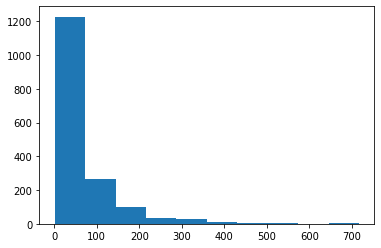

In [ ]:
plt.hist(best["freq"])
plt.show() 

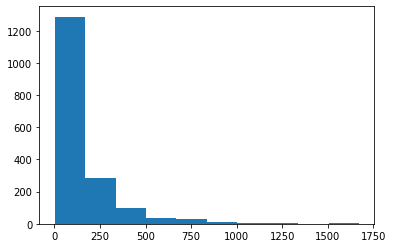

In [ ]:
plt.hist(data_tidy["freq"])
plt.show() 

Pt 4: Clustering

In [ ]:
best["child_mouth_object_cat"] = best["child_mouth_object_cat"].replace({'Breasts': 0, 'Foods': 1, 'Hands': 2, 'Liquids' : 3, 'Objects': 4, 'Soil or ash' : 5, 'Feces': 6 })

In [ ]:
best

,hh,round,rec,child_hand_interaction,child_mouth_object_cat,file_number,time,freq
0,hh164001,r1,rec1,Breastfeeding,0,576603,13882260,6
1,hh164001,r1,rec1,ObjInMouth,1,4801442,84840662,49
2,hh164001,r1,rec1,ObjInMouth,2,7244116,118160509,63
3,hh164001,r1,rec1,ObjInMouth,3,660359,5729724,7
4,hh164001,r1,rec1,ObjInMouth,4,4809807,50580678,40
...,...,...,...,...,...,...,...,...
1667,hh222214,r2,rec1,ObjInMouth,4,340028,881428,2
1668,hh222245,r1,rec1,ObjInMouth,1,24683998,307926737,221
1669,hh222245,r1,rec1,ObjInMouth,2,17057495,185165084,142
1670,hh222245,r1,rec1,ObjInMouth,3,4850304,44778505,34


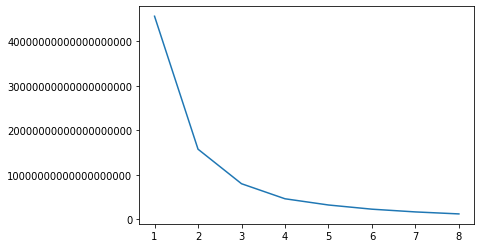

In [ ]:
#suggests there are 2-3 main clusters

yax = []
for i in range(1,9):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df)
  yax.append(kmeans.inertia_)
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
ax.plot(range(1, 9), yax)
plt.show()

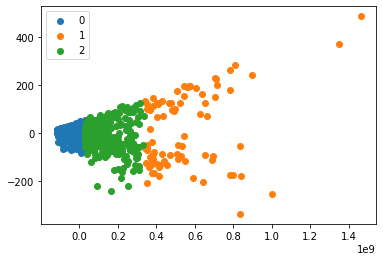

In [ ]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(best[["child_mouth_object_cat", "freq", "time"]])
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
cluster = kmeans.fit_predict(df)
 
#Getting unique clusters
labels = np.unique(cluster)
 
#plotting the results:
for i in labels:
    plt.scatter(df[cluster == i , 0] , df[cluster == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
n_clusters = 3

kmeans = KMeans(n_clusters)

pred = kmeans.fit_predict(best[["child_mouth_object_cat", "freq", "time"]])

pred

best["cluster"] = kmeans.fit_predict(best[["child_mouth_object_cat", "freq", "time"]])

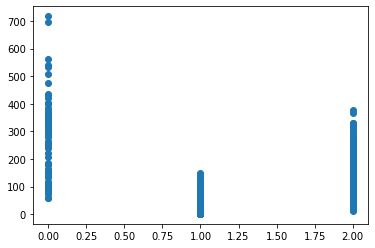

In [ ]:
plt.scatter(best["cluster"], best["freq"])

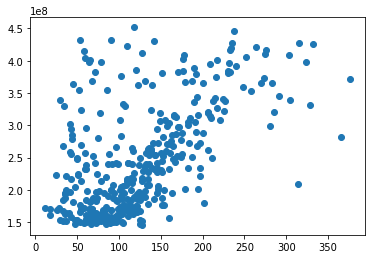

In [ ]:
plt.scatter(best[best["cluster"]== 2]["freq"], best[best["cluster"]== 2]["time"])

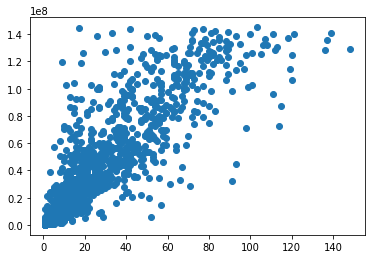

In [ ]:
plt.scatter(best[best["cluster"]== 1]["freq"], best[best["cluster"]== 1]["time"])

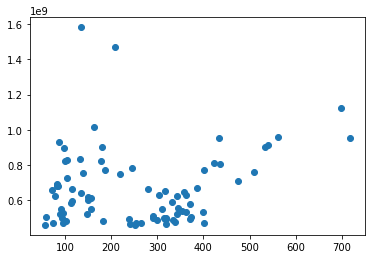

In [ ]:
plt.scatter(best[best["cluster"]== 0]["freq"], best[best["cluster"]== 0]["time"])

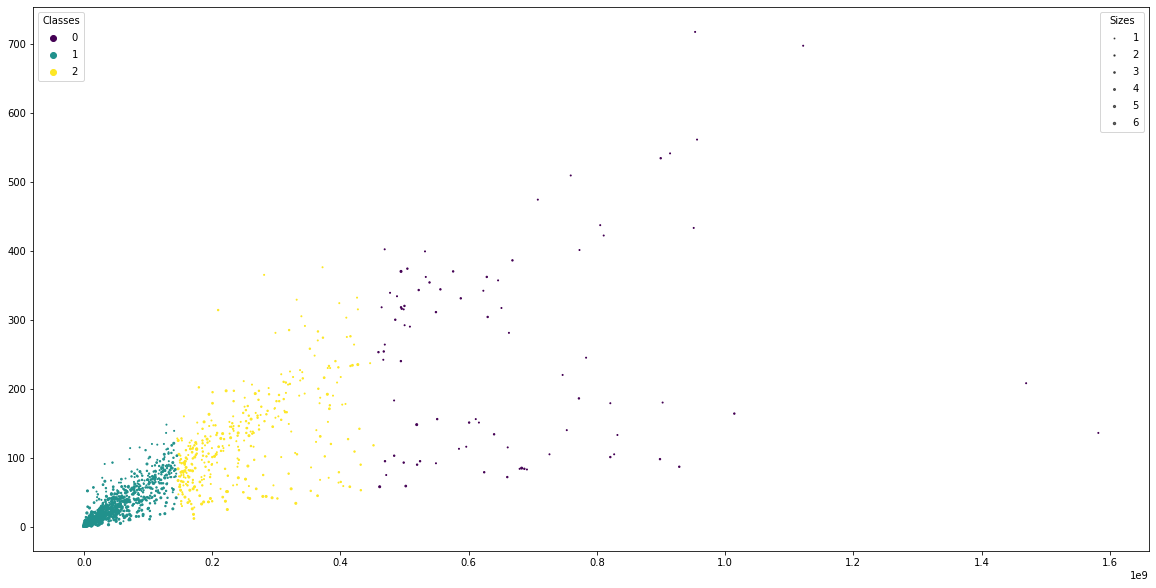

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(best["time"], best["freq"], c = best["cluster"], s=best["child_mouth_object_cat"])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.rcParams["figure.figsize"] = 40,20
plt.show()

